## Fashion MNIST Recognition with Keras (Tensorflow)



#### Result Summary:
*  Validation Accuracy - 97.71 (epochs = 8; batch_size = 100)
*  Test data Accuracy - 97.51
* Shirts and coats are highly misclassified

Fashion MNIST (https://github.com/zalandoresearch/fashion-mnist
)is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [0]:
import os
import random
import pandas as pd
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

# Allow image embeding in notebook
%matplotlib inline
# Tensorflow version 
print(tf.__version__)

1.12.0


### Parse and load the dataset

In [0]:
def load_data():
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    return (train_images, train_labels), (test_images, test_labels)


   ** images** :  a list of images, each image is represted by a numpy array.
   
  **labels** :  a list of labels. Integers with values between 0 and 10.


In [0]:
# Load training and testing datasets.
(train_images, train_labels), (test_images, test_labels) = load_data()

### Explore the Dataset

How many images and labels does it have?

Display the first image of each label.

In [0]:
print('X: Training Size: {}'.format(train_images.shape))
print('X: Test Size:     {}'.format(test_images.shape))
print('Y: Training Size: {}'.format(train_labels.shape))
print('Y: Test Size:     {}'.format(test_labels.shape))

X: Training Size: (60000, 28, 28)
X: Test Size:     (10000, 28, 28)
Y: Training Size: (60000,)
Y: Test Size:     (10000,)


The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. 

## **Images Preprocessing**

Mapping images from 0-255 scale to 0-1 scale.

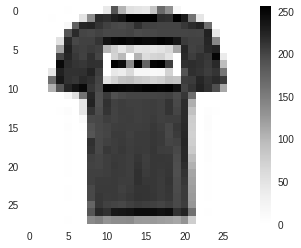

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

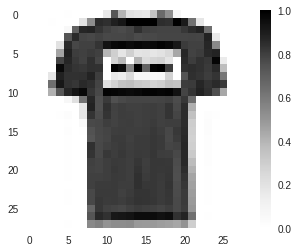

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

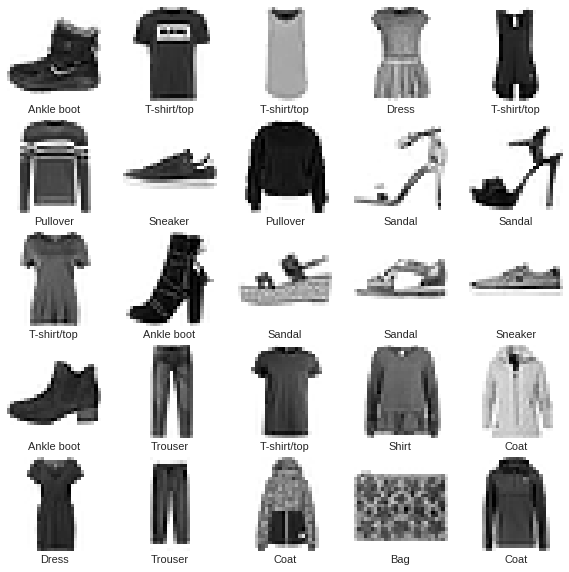

In [0]:
# Display first image of each type
def display_images_and_labels(images, labels):
  '''Inputs:
  images - an array of images
  labels - labels of each images
  imgNum - Number of first image of each label 
  Outputs:
  Displays imgNum of first image of each label'''
  #################################
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(True)
      plt.imshow(images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[labels[i]])
####################################
display_images_and_labels(train_images, train_labels)  #  function call

### Create a Model

In [0]:
# Import tensorflow libraries
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Dense, Conv2D, Flatten
from keras import utils
from keras.layers.core import Activation
import sklearn.model_selection as sk

np.random.seed(10) # to maintain data indexes
numClasses = 10
epoch = 100
inputShape = (28, 28, 1) # height,width,depth (depth = 1 for this is gray scale images)
y_train = keras.utils.to_categorical(train_labels, num_classes = numClasses)
y_test = keras.utils.to_categorical(test_labels, num_classes = numClasses)

# split into train and validation data
X_train_images, X_test_images, y_train_labels, y_test_labels = sk.train_test_split(train_images, y_train, test_size = 0.25, stratify = y_train)


In [0]:
model = Sequential()
# first set - convolution -> relu->maxpooling
#model.add(Conv2D(filters = 10, kernel_size=2, strides=(1,1),padding = 'same',activation = 'relu', input_shape=inputShape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
# second set - convolution -> relu->maxpooling
#model.add(Conv2D(filters = 64, kernel_size=2, strides=(2,2),padding = 'same',activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
# third  set - convolution -> relu->maxpooling
#model.add(Conv2D(filters = 64, kernel_size=3, strides=(2,2),padding = 'same',activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1)) 
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.3))

model.add(Dense(numClasses)) # output layer
model.add(Activation("softmax")) 

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy']) 
# For CNN, 'rmsprop' optimizer is observed to work better than all, using accuracy as performance evaluation matrix for dataset is almost balanced. 
# "Softmax" activation function is used in the output layer for multiclass problem.
#  "Dropout" are added to avoid overfitting of the model

### Training

In [0]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

history = model.fit(X_train_images, y_train_labels, batch_size=100, epochs=epoch, callbacks=callbacks, validation_data=(X_test_images, y_test_labels))

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 4s 96us/step - loss: 0.1141 - acc: 0.9543 - val_loss: 0.0774 - val_acc: 0.9691
Epoch 2/100
45000/45000 [==============================] - 4s 87us/step - loss: 0.0804 - acc: 0.9683 - val_loss: 0.0697 - val_acc: 0.9715
Epoch 3/100
45000/45000 [==============================] - 4s 85us/step - loss: 0.0724 - acc: 0.9715 - val_loss: 0.0644 - val_acc: 0.9745
Epoch 4/100
45000/45000 [==============================] - 4s 86us/step - loss: 0.0682 - acc: 0.9731 - val_loss: 0.0659 - val_acc: 0.9739
Epoch 5/100
45000/45000 [==============================] - 4s 85us/step - loss: 0.0649 - acc: 0.9744 - val_loss: 0.0616 - val_acc: 0.9758
Epoch 6/100
45000/45000 [==============================] - 4s 86us/step - loss: 0.0628 - acc: 0.9754 - val_loss: 0.0610 - val_acc: 0.9761
Epoch 7/100
45000/45000 [==============================] - 4s 86us/step - loss: 0.0608 - acc: 0.9765 - val_loss: 0.0618 - 

In [0]:
#history.history

Text(0,0.5,'Accuracy')

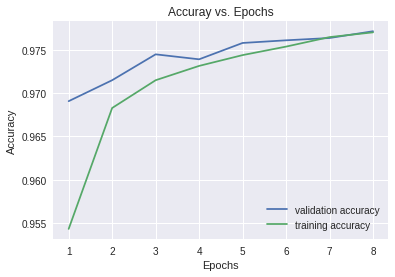

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1, (len(history.history['val_acc'])+1)), history.history['val_acc'])
plt.plot(range(1, (len(history.history['acc'])+1)), history.history['acc'])
plt.legend(['validation accuracy', 'training accuracy'])
plt.title('Accuray vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0,0.5,'Loss')

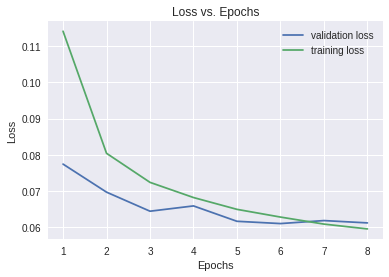

In [0]:
plt.plot(range(1, (len(history.history['val_loss'])+1)), history.history['val_loss'])
plt.plot(range(1, (len(history.history['loss'])+1)), history.history['loss'])
plt.legend(['validation loss', 'training loss'])
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Using the Model to make predictions

In [0]:
# model evaluation
model.evaluate(test_images, y_test)

10000/10000 [==============================] - 1s 73us/step


[0.06809178802967071, 0.9751300031661987]

In [0]:
# your code here
y_proba = model.predict(test_images, batch_size=32) 
y_classes = y_proba.argmax(axis=-1)
# Predicted classes vs. actual classes
dummy = pd.concat([pd.DataFrame(test_labels, columns=['Actual Classes']), pd.DataFrame(y_classes, columns = ['Predicted Classes'])], axis = 1)
dummy.head()


,Actual Classes,Predicted Classes
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


  class_names = ['T-shirt/top(0)', 'Trouser (1)', 'Pullover(2)', 'Dress(3)', 'Coat(4)', 
               'Sandal(5)', 'Shirt(6)', 'Sneaker(7)', 'Bag(8)', 'Ankle boot(9)']
               

Text(69,0.5,'Predicted values')

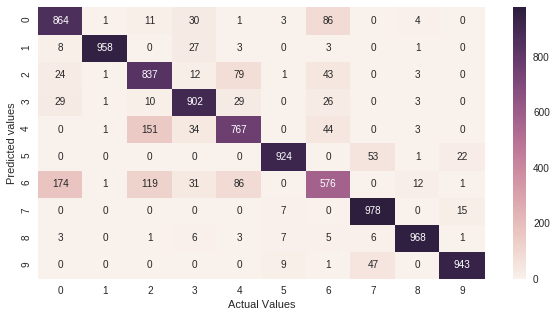

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels , y_classes, labels = [0,1,2,3,4,5,6,7,8,9])
ax = plt.figure(figsize = (10,5))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')

### Interferences:
*Major misclassifications for  shirts and coats into various classes*:

*   182 shirts are classified as T-shirt/Top
*   **80 trousers are classified as T-shirt/Top**
*   **43 dress -> T-shirt/Top**
*   **73 Coat -> T-shirt/Top**
*   **113  Coat as trousers**
*   54 sneakers as ankle boots


- Sneakers and bags are most distingushed classes

# Is this model good estimator?